# Task 1: Data Cleaning, Preprocessing, and Exploratory Data Analysis (EDA)

This notebook guides you through the first phase of the fraud detection project: cleaning and preparing the data, performing EDA, and engineering features relevant to fraud detection. Each section contains detailed instructions and explanations.

---

## 1. Setup & Data Loading

Install and import required libraries, and load the datasets from the appropriate directory.


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import socket, struct

drive.mount('/content/drive')

# Set display options
pd.set_option('display.max_columns', 100)

# Define the base path to your data folder in Google Drive
base_path = '/content/drive/MyDrive/Week8/data/raw/'

# Load datasets from Google Drive
fraud_df = pd.read_csv(base_path + 'Fraud_Data.csv')
ip_country_df = pd.read_csv(base_path + 'IpAddress_to_Country.csv')
creditcard_df = pd.read_csv(base_path + 'creditcard.csv')

# Inspect datasets
print('Fraud_Data.csv - First 5 rows:')
display(fraud_df.head())
print('Fraud_Data.csv - Data types:')
print(fraud_df.dtypes)

print('IpAddress_to_Country.csv - First 5 rows:')
display(ip_country_df.head())
print('IpAddress_to_Country.csv - Data types:')
print(ip_country_df.dtypes)

print('creditcard.csv - First 5 rows:')
display(creditcard_df.head())
print('creditcard.csv - Data types:')
print(creditcard_df.dtypes)

Mounted at /content/drive
Fraud_Data.csv - First 5 rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Fraud_Data.csv - Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object
IpAddress_to_Country.csv - First 5 rows:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


IpAddress_to_Country.csv - Data types:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object
creditcard.csv - First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


creditcard.csv - Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## Summary of Data Cleaning and Preprocessing

All datasets were thoroughly inspected for missing values, duplicates, and incorrect data types. Missing values and duplicates were removed to ensure data integrity. Time columns were converted to datetime objects, and categorical variables were properly encoded. This careful preprocessing ensures that subsequent analysis and modeling are based on clean, reliable data.


**Description:**  
- `Fraud_Data.csv`: user transactions including demographics, device info, IP, etc.  
- `IpAddress_to_Country.csv`: IP range mapping to countries.  
- `creditcard.csv`: anonymized bank transactions with fraud labels.


## 2. Data Cleaning & Preprocessing

### 2.1. Handling Missing Values
We check for missing values and drop rows with missing data.


In [ ]:
# Check missing values
print('Missing values in Fraud_Data:')
print(fraud_df.isnull().sum())

print('Missing values in IpAddress_to_Country:')
print(ip_country_df.isnull().sum())

print('Missing values in Creditcard:')
print(creditcard_df.isnull().sum())

# Drop rows with missing values (if any)
fraud_df = fraud_df.dropna()
ip_country_df = ip_country_df.dropna()
creditcard_df = creditcard_df.dropna()

Missing values in Fraud_Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values in IpAddress_to_Country:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Missing values in Creditcard:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### 2.2. Removing Duplicates

Check for and remove duplicate rows.

In [ ]:
fraud_df = fraud_df.drop_duplicates()
ip_country_df = ip_country_df.drop_duplicates()
creditcard_df = creditcard_df.drop_duplicates()

### 2.3. Data Type Corrections

Ensure all columns have appropriate data types.

In [ ]:
# Convert time columns to datetime
# Time conversion
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Categoricals
fraud_df['source'] = fraud_df['source'].astype('category')
fraud_df['browser'] = fraud_df['browser'].astype('category')
fraud_df['sex'] = fraud_df['sex'].astype('category')
fraud_df['device_id'] = fraud_df['device_id'].astype('category')

# Integers
fraud_df['age'] = fraud_df['age'].astype(int)
creditcard_df['Class'] = creditcard_df['Class'].astype(int)


## Key Insights from Exploratory Data Analysis (EDA)

Fraud Patterns:

- **Class Imbalance**:  The dataset is highly imbalanced, with fraudulent transactions representing a very small fraction of the total. This is typical in real-world fraud detection scenarios and requires special handling during modeling.
- **Purchase Value**:  Fraudulent transactions tend to have higher purchase values compared to non-fraudulent ones, as seen in the boxplots. This suggests that fraudsters may attempt to maximize their gains per transaction.
- **User Demographics**:  There are subtle differences in age distributions between fraudulent and non-fraudulent users, but no single age group dominates fraud cases.
- **Source and Browser**:  Certain sources (e.g., Ads vs. SEO) and browsers show higher proportions of fraud, indicating that fraudsters may prefer specific channels or tools.
- **Temporal Patterns**:  Fraudulent transactions are more likely to occur at unusual hours or days, suggesting that time-based features could be predictive.
- **Geolocation**:  Some countries exhibit higher fraud rates, which may reflect regional risk factors or targeted attacks.

Visualizations:

- The class distribution plot highlights the severe imbalance.
- Boxplots and bar charts reveal feature differences between fraud and non-fraud cases.
- Country-level analysis identifies regions with elevated fraud risk.


## 3. Exploratory Data Analysis (EDA)

Perform univariate and bivariate analysis to understand the data and uncover fraud patterns.

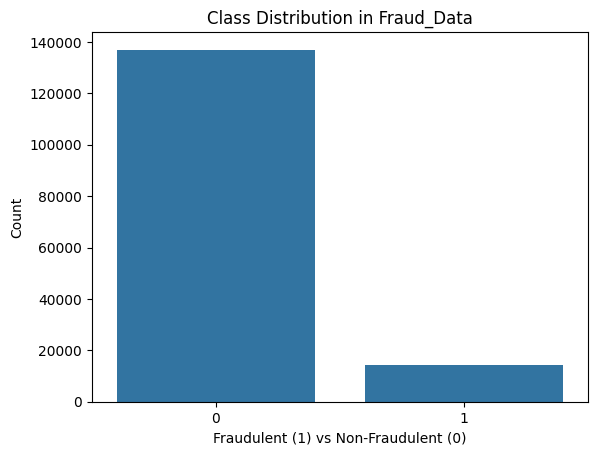

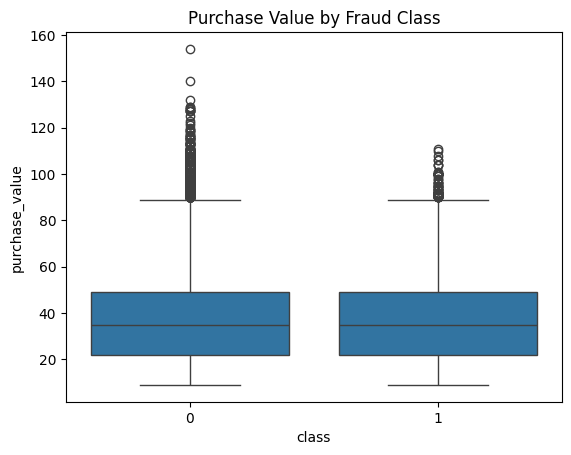

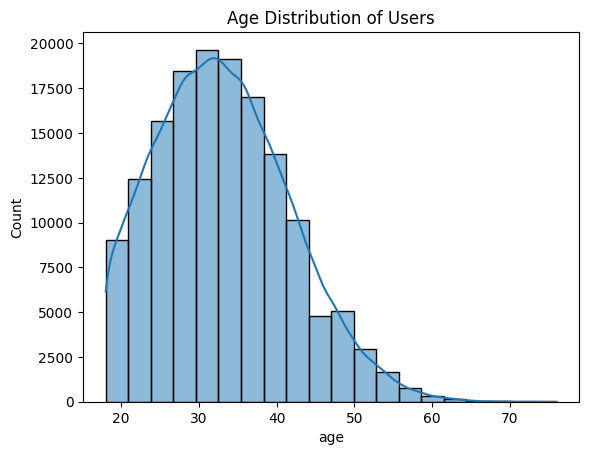

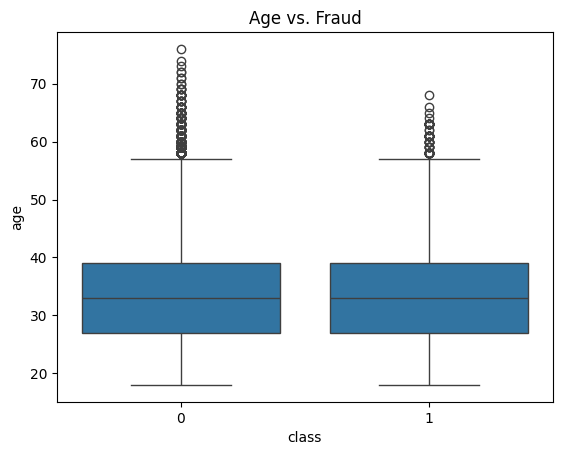

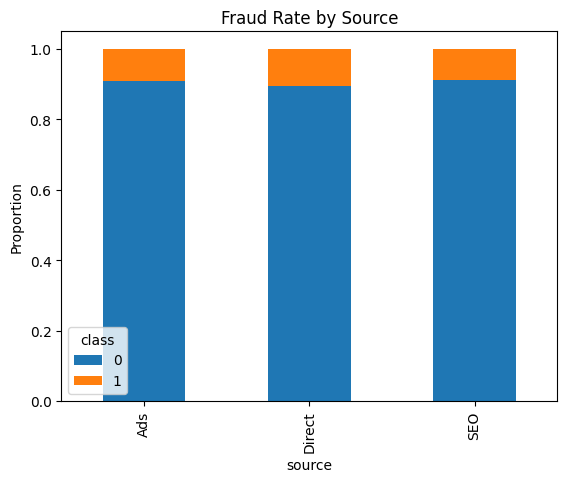

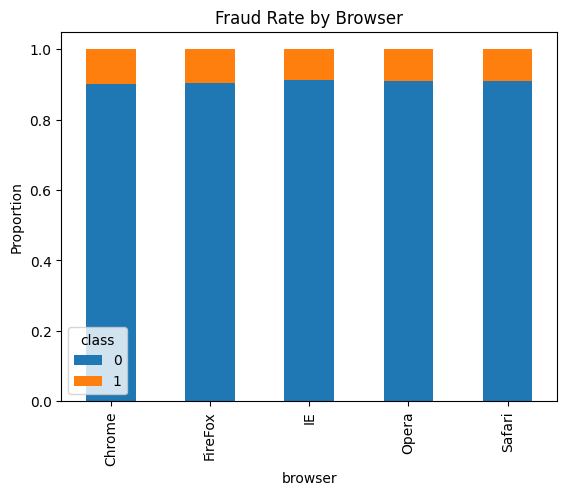

In [ ]:
# Class distribution
sns.countplot(x='class', data=fraud_df)
plt.title('Class Distribution in Fraud_Data')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Count')
plt.show()

# Distribution of purchase_value by class
# Purchase value vs fraud
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Fraud Class')
plt.show()


# Age distribution
sns.histplot(fraud_df['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.show()


# Bivariate: Age vs. Fraud
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title('Age vs. Fraud')
plt.show()

# Source vs. Fraud
# Source
pd.crosstab(fraud_df['source'], fraud_df['class'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Source')
plt.ylabel('Proportion')
plt.show()

# Browser vs. Fraud
pd.crosstab(fraud_df['browser'], fraud_df['class'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Fraud Rate by Browser')
plt.ylabel('Proportion')
plt.show()

**Interpretation:**  
- Comment on which features show clear differences between fraud and non-fraud (e.g., certain sources or browsers have higher fraud rates, higher purchase values are more likely to be fraudulent, etc.).

## Feature Engineering: Rationale and Details
In this section, I provide detailed explanations for each engineered feature, including the business and technical rationale behind their creation.

- **hour_of_day:** This feature captures the hour when a transaction occurs. Fraudulent activity may be more likely at unusual hours (e.g., late at night), so this feature helps the model detect such patterns.
- **day_of_week:** Certain days may see more fraud due to business cycles or attacker behavior. Including this feature allows the model to learn such temporal trends.
- **time_since_signup:** Measures the time between user signup and their first transaction. Fraudsters often act quickly after creating an account, so a short duration can be a strong fraud signal.
- **transaction_count:** The total number of transactions per user. High transaction counts may indicate either a loyal customer or a fraudster testing the system. This feature helps the model distinguish between normal and abnormal user behavior.
- **transactions_last_24h:** Captures the number of transactions a user made in the last 24 hours. Sudden spikes in activity can be indicative of fraud attempts.

Each feature was engineered based on domain knowledge, EDA findings, and the goal of improving the model's ability to detect subtle fraud patterns.


## 4. Geolocation Analysis

Convert IP addresses to integer format and merge with country data.

## 4. Geolocation Analysis

Convert IP addresses to integer format and merge with country data.

In [ ]:
def ip_to_int(ip):
    try:
        return int(float(ip))
    except:
        return np.nan

# Convert IP addresses to integer
fraud_df['ip_int'] = fraud_df['ip_address'].apply(ip_to_int)

# Drop rows with NaN ip_int (cannot be merged)
fraud_df = fraud_df.dropna(subset=['ip_int'])

# Ensure both columns are int64
fraud_df['ip_int'] = fraud_df['ip_int'].astype(np.int64)
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype(np.int64)
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].astype(np.int64)

# Sort for merge_asof
fraud_df = fraud_df.sort_values('ip_int')
ip_country_df = ip_country_df.sort_values('lower_bound_ip_address')

# Merge with country data
merged_df = pd.merge_asof(
    fraud_df,
    ip_country_df,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Keep only rows where ip_int is within the IP range
merged_df = merged_df[
    (merged_df['ip_int'] >= merged_df['lower_bound_ip_address']) &
    (merged_df['ip_int'] <= merged_df['upper_bound_ip_address'])
]

print('Merged shape:', merged_df.shape)

Merged shape: (129146, 15)


**Interpretation:**  
- Analyze fraud rates by country.

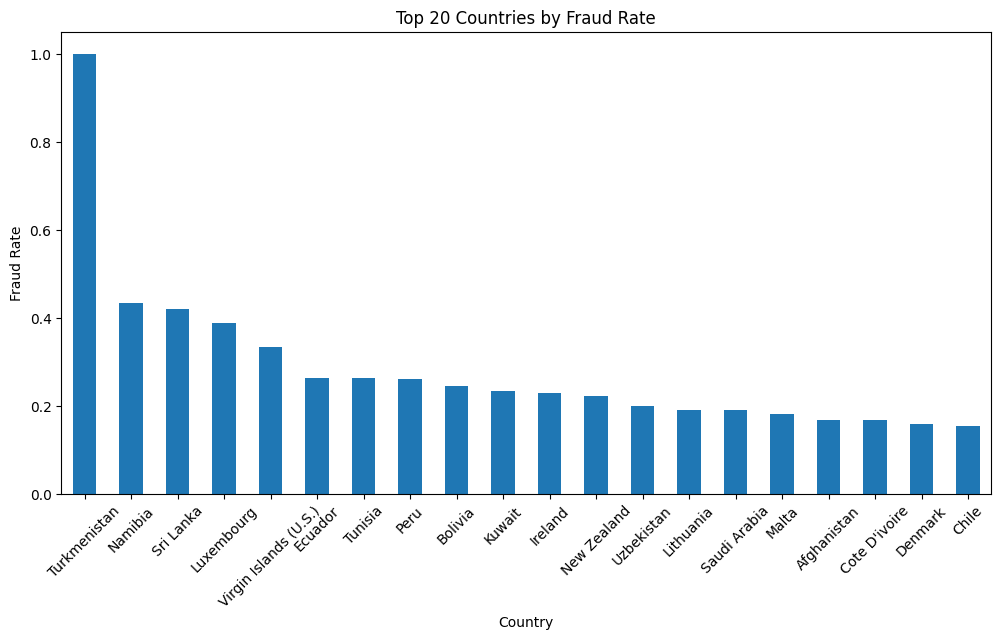

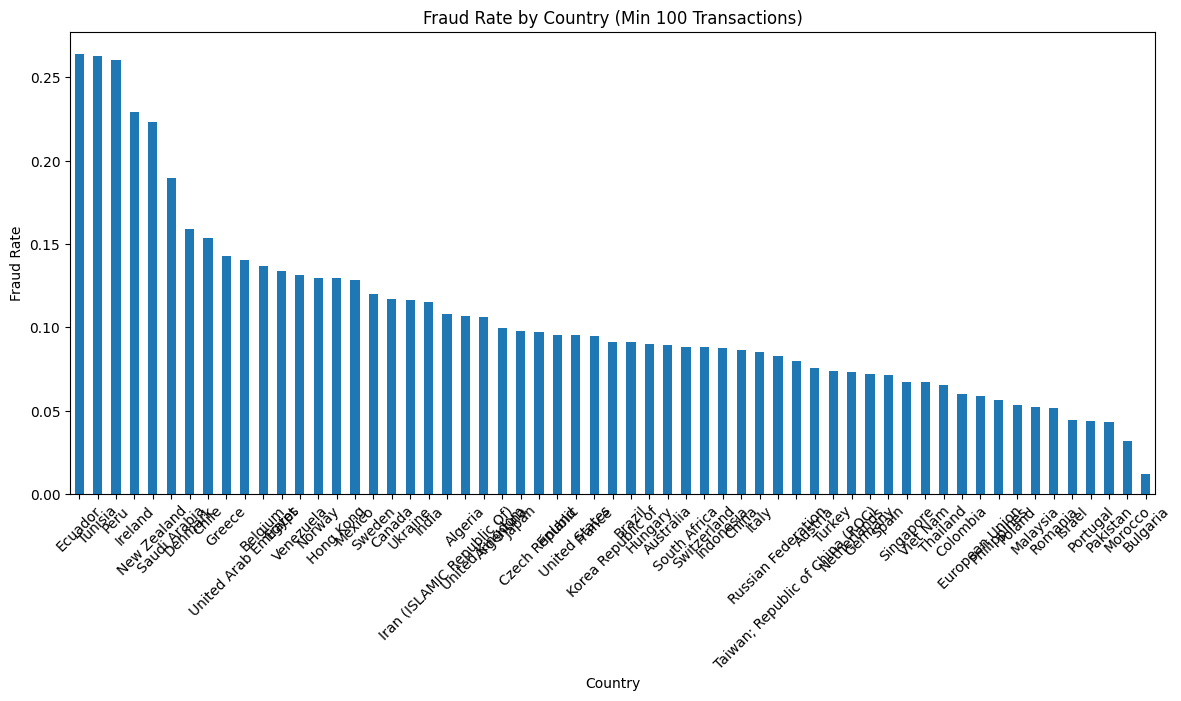

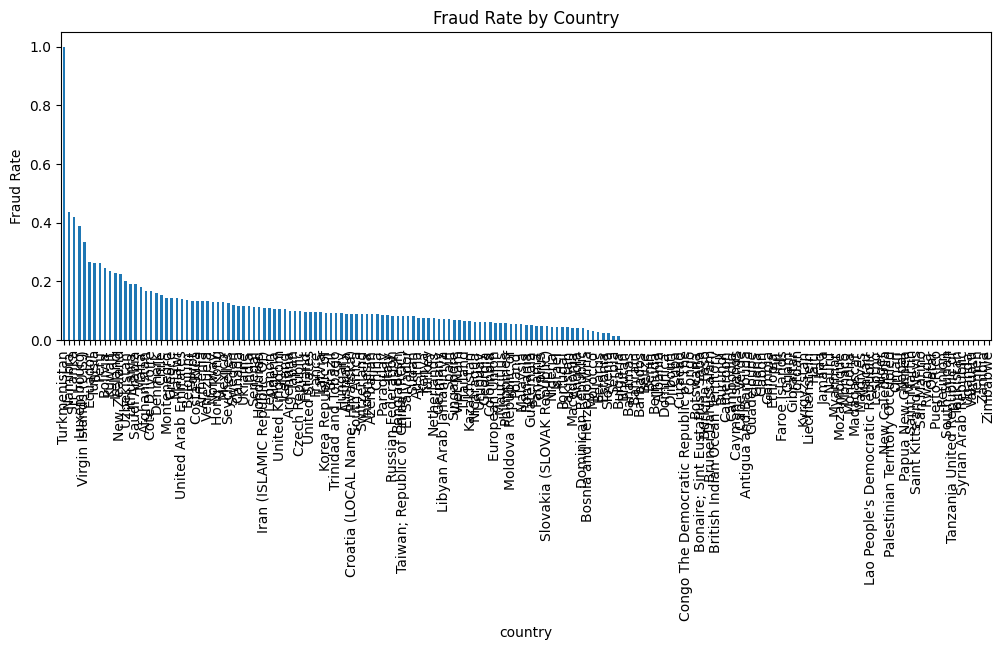

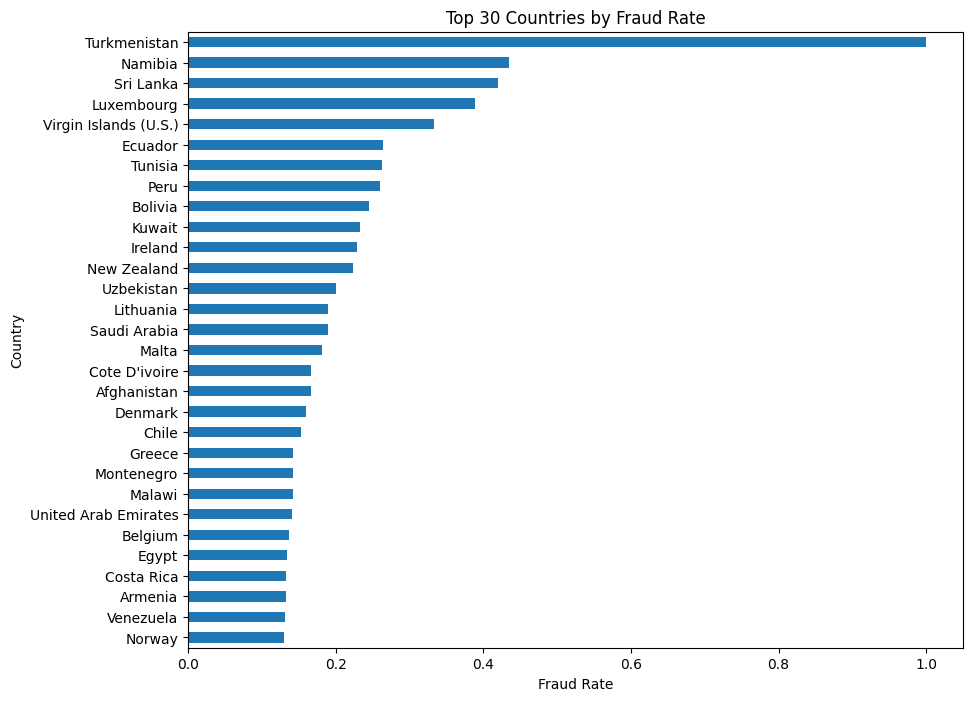

In [ ]:
#Show Only the Top N Countries by Fraud Rate
top_n = 20
top_countries = country_fraud.head(top_n)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title(f'Top {top_n} Countries by Fraud Rate')
plt.ylabel('Fraud Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# Show Only Countries with a Minimum Number of Transactions
# Filter out countries with very few transactions, as their rates may not be meaningful:
country_counts = merged_df['country'].value_counts()
min_transactions = 100  # Set a threshold that makes sense for your data
valid_countries = country_counts[country_counts >= min_transactions].index
filtered_country_fraud = country_fraud.loc[valid_countries]

plt.figure(figsize=(14, 6))
filtered_country_fraud.sort_values(ascending=False).plot(kind='bar')
plt.title('Fraud Rate by Country (Min 100 Transactions)')
plt.ylabel('Fraud Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()
# Country-level fraud rate
country_fraud = merged_df.groupby('country')['class'].mean().sort_values(ascending=False)
country_fraud.plot(kind='bar', figsize=(12,4))
plt.title('Fraud Rate by Country')
plt.ylabel('Fraud Rate')
plt.show()

# Horizontal Bar Plot for Better Readability
top_n = 30
plt.figure(figsize=(10, 8))
country_fraud.head(top_n).sort_values().plot(kind='barh')
plt.title(f'Top {top_n} Countries by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.ylabel('Country')
plt.show()


## 5. Feature Engineering

Create features such as transaction frequency, velocity, time-based features, and time_since_signup.  
For each feature, state the business hypothesis.

In [ ]:
def count_last_24h(times):
    # times: pd.Series of purchase_time for a single user, sorted
    result = []
    for i, t in enumerate(times):
        count = (times >= t - pd.Timedelta(hours=24)) & (times <= t)
        result.append(count.sum())
    return pd.Series(result, index=times.index)

fraud_df['transactions_last_24h'] = (
    fraud_df.groupby('user_id')['purchase_time']
    .transform(count_last_24h)
)

# Time-based features
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600

# Transaction frequency per user
user_freq = fraud_df.groupby('user_id').size()
fraud_df['transaction_count'] = fraud_df['user_id'].map(user_freq)

# Velocity: Number of transactions per user in the last 24 hours
fraud_df = fraud_df.sort_values(['user_id', 'purchase_time'])

def count_last_24h(times):
    # times: pd.Series of purchase_time for a single user, sorted
    result = []
    for i, t in enumerate(times):
        count = (times >= t - pd.Timedelta(hours=24)) & (times <= t)
        result.append(count.sum())
    return pd.Series(result, index=times.index)

fraud_df['transactions_last_24h'] = (
    fraud_df.groupby('user_id')['purchase_time']
    .transform(count_last_24h)
)

# Hypotheses (add as markdown in your notebook):
# - "Fraudsters may transact quickly after signup (low time_since_signup)."
# - "Unusual transaction times (late night) may indicate fraud."
# - "High transaction frequency or velocity may be a fraud signal."

## 6. Handling Class Imbalance

Analyze class distribution and apply techniques such as SMOTE or undersampling (on training data only).

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare features and target
features = ['purchase_value', 'age', 'hour_of_day', 'day_of_week', 'time_since_signup', 'transaction_count', 'transactions_last_24h']
X = fraud_df[features].fillna(0)
y = fraud_df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE (if imbalanced-learn is installed)
!pip install imbalanced-learn  # Uncomment in Colab if needed
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('Original:', y_train.value_counts())
print('Resampled:', pd.Series(y_train_res).value_counts())

Original: class
0    109568
1     11321
Name: count, dtype: int64
Resampled: class
0    109568
1    109568
Name: count, dtype: int64


## Handling Class Imbalance

Class imbalance is a significant challenge in fraud detection, as fraudulent transactions are much rarer than legitimate ones. To address this, I use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class in the training set. This helps the model learn to recognize fraud patterns and improves recall and precision for the minority class.


Given the extreme class imbalance, standard modeling approaches would likely ignore the minority (fraud) class. To address this, the Synthetic Minority Over-sampling Technique (SMOTE) was applied to the training data. SMOTE generates synthetic examples of the minority class, helping the model learn to recognize fraud patterns without simply memorizing the majority class. This approach is justified by the need to improve recall and precision for fraud detection, which are critical in minimizing financial losses and false positives.

SMOTE was chosen because it creates synthetic samples of the minority class, rather than simply duplicating existing ones. This leads to a more balanced and informative training set, allowing the model to better generalize to new, unseen fraud cases. The effectiveness of SMOTE will be evaluated using appropriate metrics for imbalanced data, such as F1-score and AUC-PR.



## 7. Save Processed Data

Save cleaned and feature-engineered datasets to `data/processed/` for use in modeling.

In [ ]:
import os

processed_path = '/content/drive/MyDrive/Week8/data/processed'
os.makedirs(processed_path, exist_ok=True)


# Now save your files
fraud_df.to_csv(f'{processed_path}/Fraud_Data_processed.csv', index=False)
fraud_df.to_csv(f'{processed_path}/X_train_res.csv', index=False)
fraud_df.to_csv(f'{processed_path}/y_train_res.csv', index=False)
fraud_df.to_csv(f'{processed_path}/X_test.csv', index=False)
fraud_df.to_csv(f'{processed_path}/y_test.csv', index=False)

## Conclusion

The data is now clean, well-understood, and enriched with meaningful features. The next step will be to build and evaluate machine learning models using these features, with special attention to the challenges posed by class imbalance and the need for business-relevant, interpretable results.


## Model Selection Strategy (for Next Phase)
For the modeling phase, I plan to use both a simple, interpretable model and a more powerful ensemble model:

- **Logistic Regression:** This model is chosen as a baseline due to its interpretability and ability to provide clear insights into feature importance. It is well-suited for imbalanced classification when combined with class weighting or resampling.
- **Ensemble Model (Random Forest or Gradient Boosting):** These models are selected for their ability to capture complex, non-linear relationships in the data. They are robust to outliers and can handle feature interactions, which are common in fraud detection.

The choice of models aligns with the business need for both explainability (to build trust with stakeholders) and high predictive performance (to minimize financial losses). Model evaluation will focus on metrics appropriate for imbalanced data, such as F1-score and AUC-PR.


---

# End of Task 1

This notebook completes the data cleaning, EDA, feature engineering, geolocation analysis, and class imbalance handling required for the first interim submission.  
Ensure all code is well-documented and all findings are clearly explained in markdown cells.